In [660]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
df = pd.read_csv('assurance_maladie.csv')
df.describe().round(3)


,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [662]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [663]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [664]:
df.duplicated().sum()

np.int64(1)

In [665]:
df.drop_duplicates(inplace=True)

In [666]:
df.duplicated().sum()

np.int64(0)

In [667]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [668]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

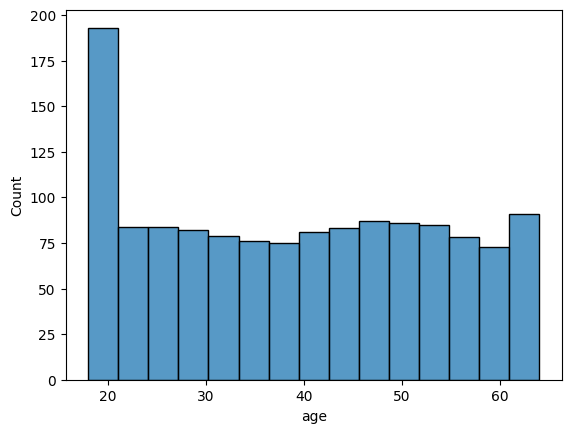

In [669]:
sns.histplot(data=df , x="age", binwidth=3)
plt.show()


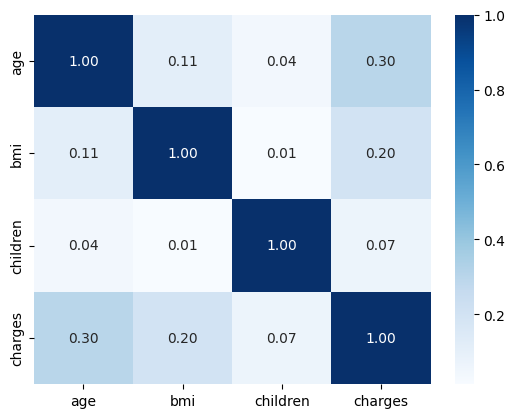

In [670]:
selected_columns_nums = ['age' , 'bmi' , 'children' , 'charges']
df_num = df[selected_columns_nums]
sns.heatmap(df_num.corr() , annot=True , cmap="Blues" , fmt=".2f" )
plt.show()


In [671]:
selected_columns_nums = ['age' , 'bmi' , 'children' , 'charges']

imputer_mean = SimpleImputer(strategy='mean')
df[selected_columns_nums] = imputer_mean.fit_transform(df[selected_columns_nums])


selected_columns_string = ['sex' , 'smoker' , 'region']
for i in range(len(selected_columns_string)):
    
    mode_category = df[selected_columns_string[i]].mode()[0]

    # Fill missing values with the calculated mode
    df[selected_columns_string].fillna(mode_category, inplace=True)
    
print(df)

    



       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1337 rows x 7 columns]


C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns_string].fillna(mode_category, inplace=True)
C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns_string].fillna(mode_category, inplace=True)
C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\976773499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [672]:
df.duplicated().sum()

np.int64(0)

<Axes: >

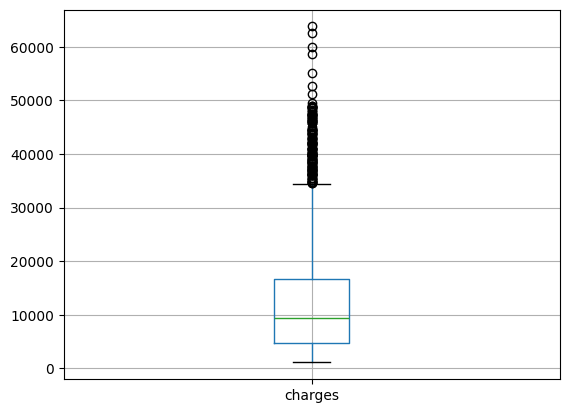

In [673]:
df.boxplot('charges')

<Axes: ylabel='bmi'>

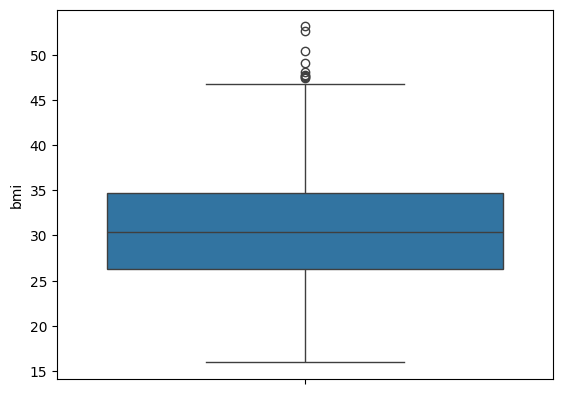

In [674]:
sns.boxplot(df["bmi"])

In [675]:
print(df.shape)

(1337, 7)


In [676]:
#from scipy.stats import zscore

#for i in range(len(selected_columns_nums)):
    #df['Z-score'] = zscore(df[selected_columns_nums[i]])
   # df = df[df['Z-score'].abs() <= 3]  

#df = df.drop(columns=['Z-score'])     
#print(df)




In [677]:
#outliers = df[df['Z-score'].abs() > 3]
#print(outliers)


In [678]:
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [679]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]


df['charges'] = np.log(df['charges'])

df.info

C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\2189914048.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges'] = np.log(df['charges'])


<bound method DataFrame.info of        age     sex     bmi  children smoker     region    charges
0     19.0  female  27.900       0.0    yes  southwest   9.734176
1     18.0    male  33.770       1.0     no  southeast   7.453302
2     28.0    male  33.000       3.0     no  southeast   8.400538
3     33.0    male  22.705       0.0     no  northwest   9.998092
4     32.0    male  28.880       0.0     no  northwest   8.260197
...    ...     ...     ...       ...    ...        ...        ...
1333  50.0    male  30.970       3.0     no  northwest   9.268661
1334  18.0  female  31.920       0.0     no  northeast   7.698927
1335  18.0  female  36.850       0.0     no  southeast   7.396233
1336  21.0  female  25.800       0.0     no  southwest   7.604867
1337  61.0  female  29.070       0.0    yes  northwest  10.279914

[1328 rows x 7 columns]>

In [680]:
print(df.shape)
df_cleaned = df

(1328, 7)


<Axes: >

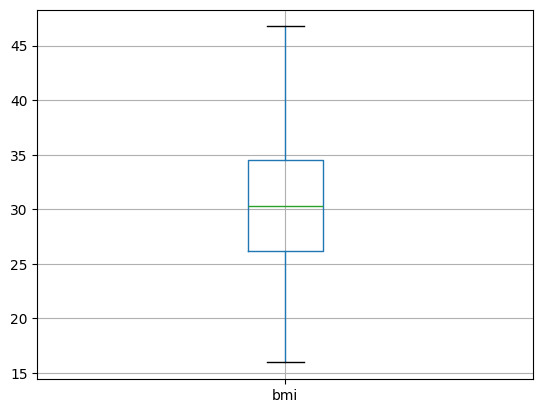

In [681]:
df_cleaned.boxplot('bmi')

In [682]:
catg_cols = df_cleaned.select_dtypes(include='object').columns.to_list()
print(catg_cols)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore' )
encoder.fit(df_cleaned[catg_cols])

encoded_cols = list(encoder.get_feature_names_out(catg_cols))
df_cleaned[encoded_cols] = encoder.transform(df_cleaned[catg_cols])
print(df_cleaned[encoded_cols])
print(df_cleaned)

['sex', 'smoker', 'region']
      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0       1.0        1.0         0.0               0.0   
2            0.0       1.0        1.0         0.0               0.0   
3            0.0       1.0        1.0         0.0               0.0   
4            0.0       1.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1333         0.0       1.0        1.0         0.0               0.0   
1334         1.0       0.0        1.0         0.0               1.0   
1335         1.0       0.0        1.0         0.0               0.0   
1336         1.0       0.0        1.0         0.0               0.0   
1337         1.0       0.0        0.0         1.0               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0

C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\3496052825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[encoded_cols] = encoder.transform(df_cleaned[catg_cols])
C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\3496052825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[encoded_cols] = encoder.transform(df_cleaned[catg_cols])
C:\Users\abirm\AppData\Local\Temp\ipykernel_21140\3496052825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [683]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns= ['charges' , 'smoker' , 'sex' , 'region'])
Y = df_cleaned['charges']

#Y.head()
# X.shape
# Y.shape
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , random_state=11 , test_size=0.2)


# X_train.shape
# X_test.shape
# # Y_train.shape
# Y_test.shape
# X_train.describe().round(3)

#rint(df_cleaned)

X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [684]:


X1 = df_cleaned[selected_columns_nums]
X2 = df_cleaned[selected_columns_nums]
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1 , columns=selected_columns_nums)
X1.head()
X1.describe().round(3)



,age,bmi,children,charges
count,1328.000,1328.000,1328.000,1328.000
mean,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000
min,-1.512,-2.462,-0.909,-2.268
25%,-0.871,-0.729,-0.909,-0.692
50%,-0.016,-0.040,-0.080,0.051
75%,0.839,0.667,0.748,0.676
max,1.765,2.739,3.232,2.126


In [685]:
from sklearn.preprocessing import MinMaxScaler
scaleminmax = MinMaxScaler(feature_range=(0,1))
X2 = scaleminmax.fit_transform(X2)
X2 = pd.DataFrame(X2 , columns=selected_columns_nums)
X2.describe().round(3)



,age,bmi,children,charges
count,1328.000,1328.000,1328.000,1328.000
mean,0.461,0.473,0.219,0.516
std,0.305,0.192,0.242,0.228
min,0.000,0.000,0.000,0.000
25%,0.196,0.333,0.000,0.359
50%,0.457,0.466,0.200,0.528
75%,0.717,0.602,0.400,0.670
max,1.000,1.000,1.000,1.000


In [686]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,female,27.900,0.0,yes,southwest,9.734176,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,male,33.770,1.0,no,southeast,7.453302,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,male,33.000,3.0,no,southeast,8.400538,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,male,22.705,0.0,no,northwest,9.998092,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,male,28.880,0.0,no,northwest,8.260197,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,9.268661,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,female,31.920,0.0,no,northeast,7.698927,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,female,36.850,0.0,no,southeast,7.396233,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,female,25.800,0.0,no,southwest,7.604867,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [687]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
lm = LinearRegression()
lm.fit(X_train , Y_train)
lm.coef_
cdf = pd.DataFrame(lm.coef_ , X.columns , columns=['Coef'])
#print(cdf)

y_pred = lm.predict(X_test)
mean_absolute_error(Y_test, y_pred)






0.27305141444118214

In [688]:
mean_squared_error(Y_test , y_pred)

0.20296972574919558

In [689]:
r2_score(Y_test , y_pred)

0.7382837268421855

In [690]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train , Y_train)
y_pred = rfr.predict(X_test)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mean_absolute_error(Y_test, y_pred)


0.20271810072399224

In [691]:
mean_squared_error(Y_test , y_pred)

0.1888054569248188

In [692]:
r2_score(Y_test , y_pred)


0.7565476311512546

In [693]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , Y_train)
y_pred = xgb.predict(X_test)
mean_absolute_error(Y_test, y_pred)


0.2402201195005847

In [694]:
#y_pred_train = xgb.predict(X_train)
#mean_absolute_error( Y_train, y_pred_train)

In [695]:
mean_squared_error(Y_test , y_pred)

0.21923809395913038

In [696]:
r2_score(Y_test , y_pred)

0.7173067230917625

In [697]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train , Y_train)

y_pred = svr.predict(X_test)
mean_absolute_error(Y_test , y_pred)

0.43597461865695875

In [698]:
mean_squared_error(Y_test , y_pred)

0.596273624993249

In [699]:
r2_score(Y_test , y_pred)

0.23114390414871067

In [700]:
from sklearn.model_selection import GridSearchCV

param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'positive': [True,False]}
model = LinearRegression()
grid_search = GridSearchCV(model, param_space, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")






Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score: 0.7683697641892812


In [701]:
params = {'copy_X': True, 
               'fit_intercept': True, 
               'positive': False}

lnr = LinearRegression(**params)
lnr.fit(X_train , Y_train)
y_pred = lnr.predict(X_test)
mean_absolute_error(Y_test, y_pred)

0.27305141444118214

In [702]:
mean_squared_error(Y_test, y_pred)

0.20296972574919558

In [703]:
r2_score(Y_test, y_pred)

0.7382837268421855

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5 , n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8335734119936016


In [705]:
params = {
    'n_estimators': 300,  # Number of trees in the forest
    'max_depth': 10,  # Maximum depth of the tree
    'min_samples_split':  10,  # Minimum number of samples required to split an internal node
}

rd = RandomForestRegressor(**params)
rd.fit(X_train , Y_train)
y_pred = rd.predict(X_test)
mean_absolute_error(Y_test, y_pred)

0.2088028884673661

In [706]:
mean_squared_error(Y_test, y_pred)


0.17936578175309442

In [707]:
r2_score(Y_test, y_pred)


0.7687194789312374